In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import igraph as ig
import os

In [8]:
def read_daily_dfs():
    list_of_dfs = []
    for f in sorted(os.listdir('./logs')):
        if not f.endswith('ipynb_checkpoints'):
            df = pd.read_csv(f'./logs/{f}', sep=',', engine='python')
            list_of_dfs.append(df)

    return list_of_dfs    

In [9]:
def calc_mae(actual, pred):
    true_values = np.array(actual)
    predicted_values = np.array(pred)
    mae = np.mean(np.abs(true_values - predicted_values))
    return mae

In [10]:
dfs = read_daily_dfs()
dfs[0].head()

,Unnamed: 0,Country,CumulativeProbability,InDegreeDivMax,RandomProbability,InfectedShare,first_occurrence,isInfected
0,0,Papua New Guinea,0.001927,0.019231,0.132195,0.040000,2020-03-20,False
1,1,Bahrain,0.001927,0.019231,0.870532,0.093023,2020-02-24,False
2,2,Saudi Arabia,0.005780,0.057692,0.339120,0.032258,2020-03-02,False
3,3,Laos,0.017341,0.173077,0.265526,0.025000,2020-03-24,False
4,4,Czech Republic,0.001927,0.019231,0.416834,0.033846,2020-03-01,False


In [11]:
np.mean(dfs[0]['InDegreeDivMax']), np.mean(dfs[0]['isInfected'] == True)

(0.1535502958579881, 0.046153846153846156)

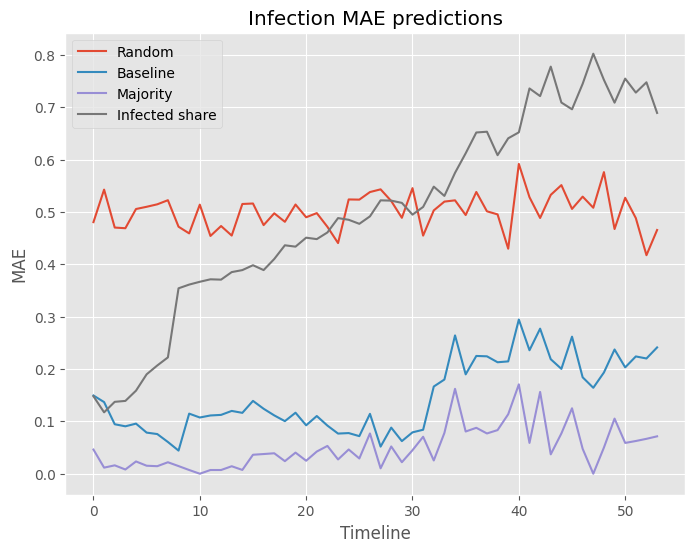

In [34]:
rmae, bmea, mmae, smea = [], [], [], []
for df in dfs:
    filtered_df = df.copy()
    actual = np.array(filtered_df['isInfected'].astype(float))
    mae_majority = calc_mae(actual, [0.0] * len(actual))
    mae_randoms = calc_mae(actual, filtered_df['RandomProbability'])
    mae_base = calc_mae(actual, filtered_df['InDegreeDivMax'])
    mea_share = calc_mae(actual, filtered_df['InfectedShare'])
    rmae.append(mae_randoms)
    bmea.append(mae_base)
    mmae.append(mae_majority)
    smea.append(mea_share)

x = np.arange(len(rmae))
rmae, bmea, mmae, smea = np.array(rmae), np.array(bmea), np.array(mmae), np.array(smea)

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')

plt.ylabel('MAE')
plt.xlabel('Timeline')
plt.plot(x, rmae, label='Random')
plt.plot(x, bmea, label='Baseline')
plt.plot(x, mmae, label='Majority')
plt.plot(x, smea, label='Infected share')
plt.title('Infection MAE predictions')
plt.legend()

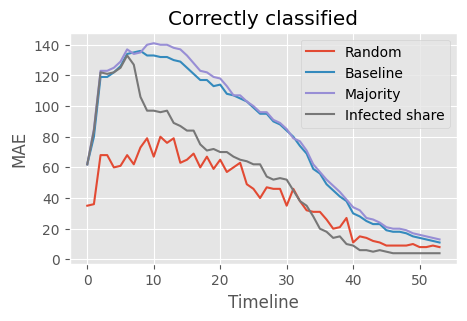

In [43]:
rmae, bmea, mmae, smea = [], [], [], []
for df in dfs:
    filtered_df = df.copy()
    filtered_df = filtered_df[((filtered_df['isInfected'] == False) | (filtered_df['InDegreeDivMax'] > 0.5))] 
    if len(filtered_df):
        actual = np.array(filtered_df['isInfected'].astype(int))
        mae_randoms = np.sum(actual == (filtered_df['RandomProbability'] > 0.5))
        mae_base = np.sum(actual == (filtered_df['InDegreeDivMax'] > 0.5))
        mea_share = np.sum(actual == (filtered_df['InfectedShare'] > 0.5))
        mae_majority = np.sum(actual == ([0] * len(actual)))
        rmae.append(mae_randoms)
        bmea.append(mae_base)
        mmae.append(mae_majority)
        smea.append(mea_share)


x = np.arange(len(rmae))
rmae, bmea, mmae, smea = np.array(rmae), np.array(bmea), np.array(mmae), np.array(smea)

plt.figure(figsize=(5, 3))
plt.rcParams.update({'font.size': 16})
plt.style.use('ggplot')

plt.ylabel('MAE')
plt.xlabel('Timeline')
plt.plot(x, rmae, label='Random')
plt.plot(x, bmea, label='Baseline')
plt.plot(x, mmae, label='Majority')
plt.plot(x, smea, label='Infected share')
plt.title('Correctly classified')
plt.legend()

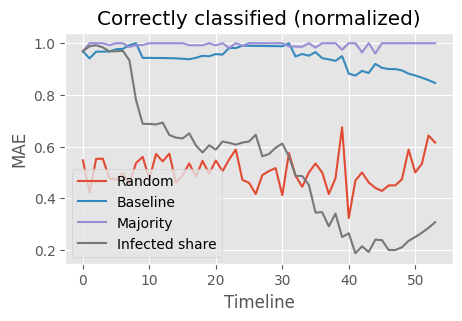

In [44]:
rmae, bmea, mmae, smea = [], [], [], []
for df in dfs:
    filtered_df = df.copy()
    filtered_df = filtered_df[((filtered_df['isInfected'] == False) | (filtered_df['InDegreeDivMax'] > 0.5))] 
    if len(filtered_df):
        actual = np.array(filtered_df['isInfected'].astype(int))
        mae_randoms = np.mean(actual == (filtered_df['RandomProbability'] > 0.5))
        mae_base = np.mean(actual == (filtered_df['InDegreeDivMax'] > 0.5))
        mea_share = np.mean(actual == (filtered_df['InfectedShare'] > 0.5))
        mae_majority = np.mean(actual == ([0] * len(actual)))
        rmae.append(mae_randoms)
        bmea.append(mae_base)
        mmae.append(mae_majority)
        smea.append(mea_share)


x = np.arange(len(rmae))
rmae, bmea, mmae = np.array(rmae), np.array(bmea), np.array(mmae)

plt.figure(figsize=(5, 3))
plt.style.use('ggplot')
plt.ylabel('MAE')
plt.xlabel('Timeline')
plt.plot(x, rmae, label='Random')
plt.plot(x, bmea, label='Baseline')
plt.plot(x, mmae, label='Majority')
plt.plot(x, smea, label='Infected share')
plt.title('Correctly classified (normalized)')
plt.legend()

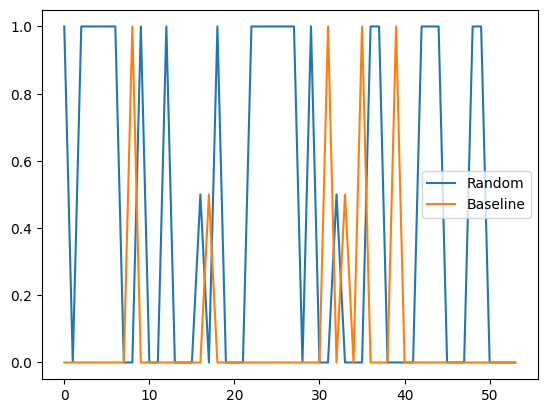

In [15]:
rmae, bmea, mmae = [], [], []
for df in dfs:
    filtered_df = df.copy()
    filtered_df = filtered_df[(filtered_df['InDegreeDivMax'] > 0.9)] 
    if len(filtered_df):
        actual = np.array(filtered_df['isInfected'].astype(int))
        mae_randoms = np.mean(actual == (filtered_df['RandomProbability'] > 0.5))
        mae_base = np.mean(actual == (filtered_df['InDegreeDivMax'] > 0.9))
        mae_majority = np.mean(actual == ([0] * len(actual)))
        rmae.append(mae_randoms)
        bmea.append(mae_base)
        mmae.append(mae_majority)


x = np.arange(len(rmae))
rmae, bmea, mmae = np.array(rmae), np.array(bmea), np.array(mmae)

plt.plot(x, rmae, label='Random')
plt.plot(x, bmea, label='Baseline')
#plt.plot(x, mmae, label='Majority')
plt.legend()